<a href="https://colab.research.google.com/github/ShreyJais/Quantum-Computing/blob/main/2348558_QC_lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit qiskit_aer pylatexenc

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

### Implementation of Deutsch's Algorithm (Query Algorithm)

Deutsch's algorithm is a simple yet significant quantum algorithm demonstrating the power of quantum computation. It determines whether a given function \( f \) is *constant* (same output for all inputs) or *balanced* (different outputs for different inputs) using fewer function calls compared to classical methods.


#### **Step 1: Define the Query Function Gates**
The `deutsch_function` defines the four possible cases of a binary function \( f: \{0, 1\} \rightarrow \{0, 1\} \). These cases are represented as quantum circuits.

In [ ]:
from qiskit import QuantumCircuit

def deutsch_function(case: int):
    if case not in [1, 2, 3, 4]:
        raise ValueError("Case must be 1, 2, 3, or 4.")

    f = QuantumCircuit(2)
    if case in [2, 3]:
        f.cx(0, 1)
    if case in [3, 4]:
        f.x(1)
    return f

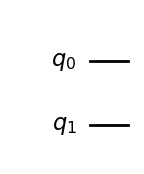

In [ ]:
f = deutsch_function(1)
display(f.draw(output='mpl'))

The circuit does not apply any quantum gates, representing a constant function.

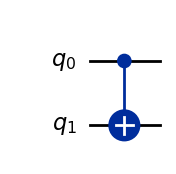

In [ ]:
f = deutsch_function(2)
display(f.draw(output='mpl'))

The circuit applies a CNOT gate, representing a balanced function.

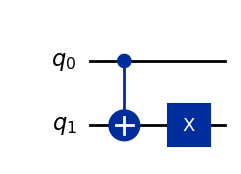

In [ ]:
f = deutsch_function(3)
display(f.draw(output='mpl'))

The circuit applies a CNOT and an X gate, representing a balanced function.

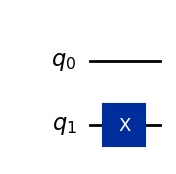

In [ ]:
f = deutsch_function(4)
display(f.draw(output='mpl'))

The circuit applies an X gate to the second qubit, representing a constant function.

---

#### **Step 2: Compile the Complete Circuit**
The algorithm uses an auxiliary qubit (set to \(|1\rangle\)) to interact with the function and applies Hadamard gates to create superposition.

In [ ]:
def compile_circuit(function: QuantumCircuit):

    n = function.num_qubits - 1
    qc = QuantumCircuit(n+1, n)

    qc.x(n)
    qc.h(range(n+1))

    qc.barrier()
    qc.compose(function, inplace=True)
    qc.barrier()

    qc.h(range(n))
    qc.measure(range(n), range(n))

    return qc

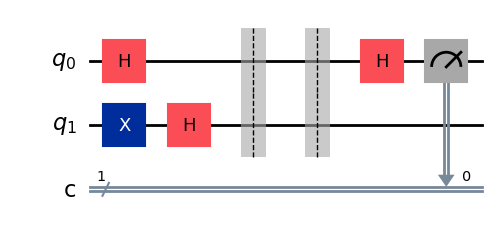

In [ ]:
full_circuit = compile_circuit(deutsch_function(1))
display(full_circuit.draw(output='mpl'))

**Case 1: Constant Function $ (f(0) = 0, f(1) = 0) $**
- The oracle does **nothing** to the qubits because $ ( f(x) = 0 ) $ for all inputs.
- The circuit design reflects this by omitting gates in the oracle.
- After the Hadamard gates, interference ensures the measurement result on $ q_0 $ is always $|0\rangle$, confirming the function is constant.

---

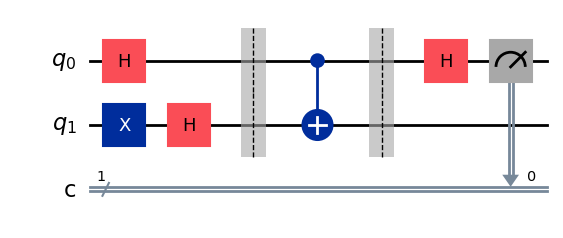

In [ ]:
full_circuit = compile_circuit(deutsch_function(2))
display(full_circuit.draw(output='mpl'))



**Case 2: Balanced Function $(f(0) = 0, f(1) = 1)$**
- The oracle applies a **CNOT gate** $( CX )$ to flip $ q_1 $ (the auxiliary qubit) when $ q_0 = 1 $.
- This encodes the balanced nature of $ f(x) $ into the quantum state.
- After applying Hadamard on $ q_0 $, the interference produces $|1\rangle$ on measurement, identifying the function as balanced.

---



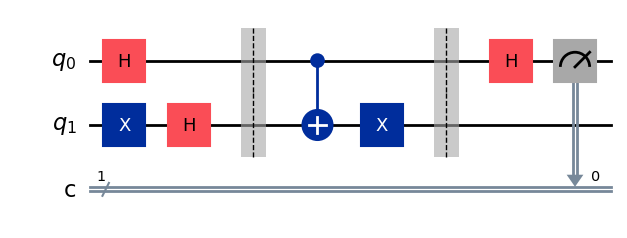

In [ ]:
full_circuit = compile_circuit(deutsch_function(3))
display(full_circuit.draw(output='mpl'))

**Case 3: Balanced Function $(f(0) = 1, f(1) = 0)$**
- The oracle uses a combination of **CNOT** $( CX )$ and $( X )$ gates to flip $( q_1 )$ and invert the outputs. This ensures $( f(0) \neq f(1) )$, reflecting a balanced function.
- The circuit design is distinct, with both gates encoding the specific balanced behavior of case 3.
- Measurement of $( q_0 )$ after interference produces $|1\rangle$, correctly identifying the function as balanced.

---



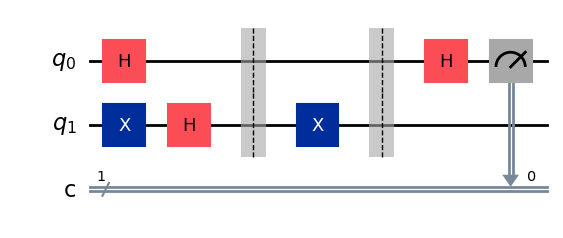

In [ ]:
full_circuit = compile_circuit(deutsch_function(4))
display(full_circuit.draw(output='mpl'))

**Case 4: Constant Function $(f(0) = 1, f(1) = 1)$**
- The oracle applies a single $( X )$ gate to flip $( q_1 )$, ensuring the function outputs $( 1 )$ for all inputs.
- The simplicity of the circuit highlights that $( f(x) )$ is constant.
- After interference, $( q_0 )$ measures to $|0\rangle$, confirming the constant nature of the function.

---

#### **Step 3: Execute the Algorithm**
Finally, execute the circuit on a simulator and interpret the result.

In [ ]:
def deutsch_algorithm(function: QuantumCircuit):
    qc = compile_circuit(function)

    simulator = AerSimulator()
    result = simulator.run(qc, shots=1, memory=True).result()

    measurements = result.get_memory()
    if measurements[0] == "0":
        return "constant"
    return "balanced"

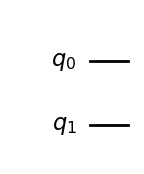

Result: constant


In [ ]:
f = deutsch_function(1)
display(f.draw(output="mpl"))

result = deutsch_algorithm(f)
print("Result:", result)

**Algorithm Outcome**:
  - The interference results in \( q_0 = 0 \), indicating that the function is **constant**.

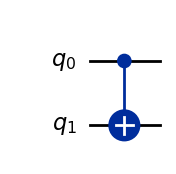

Result: balanced


In [ ]:
f = deutsch_function(2)
display(f.draw(output="mpl"))

result = deutsch_algorithm(f)
print("Result:", result)

**Algorithm Outcome**:
  - After interference, \( q_0 \) measures as \(|1\rangle\), identifying the function as **balanced**.

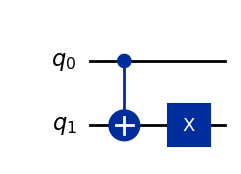

Result: balanced


In [ ]:
f = deutsch_function(3)
display(f.draw(output="mpl"))

result = deutsch_algorithm(f)
print("Result:", result)

**Algorithm Outcome:**
- The Hadamard gates prepare a superposition of states, and the oracle modifies the auxiliary qubit based on the balanced function's behavior.
- After the final Hadamard and measurement on \( q_0 \), interference ensures that the outcome is \(|1\rangle\), correctly identifying the function as **balanced**.

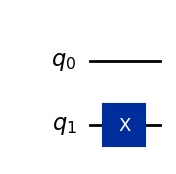

Result: constant


In [ ]:
f = deutsch_function(4)
display(f.draw(output="mpl"))

result = deutsch_algorithm(f)
print("Result:", result)

**Algorithm Outcome**:
  - Interference results in $( q_0 = 0 )$, confirming that the function is **constant**.

### Summary:

| **Case** | **Oracle Design** | **Function Type** | **Result** |
|----------|--------------------|-------------------|------------|
| 1        | No gates           | Constant          | 0          |
| 2        | CNOT only          | Balanced          | 1          |
| 3        | CNOT + \( X \)     | Balanced          | 1          |
| 4        | \( X \) only       | Constant          | 0          |

Each case is uniquely represented by its oracle and correctly classified by the quantum circuit through interference and measurement.

### **Inference:**

1. **Efficiency of Deutsch's Algorithm**: The algorithm demonstrates how quantum computation can distinguish between constant and balanced functions with a single query to the oracle, showcasing the power of quantum interference and superposition compared to classical methods requiring two queries.

2. **Circuit Design and Oracle Encoding**: The oracle's design plays a crucial role in defining the nature of the function. The specific gates used (e.g., \( CX \), \( X \)) encode whether the function is constant or balanced, highlighting the flexibility of quantum circuits to represent diverse logical behaviors.

3. **Outcome Interpretation through Measurement**: The final measurement of the input qubit (\( q_0 \)) directly determines the function type: a result of $ |0\rangle $ indicates a constant function, while $ |1\rangle $ confirms a balanced function, validating the algorithm's correctness and reliability in functional classification.